In [180]:
import pandas as pd
from espn_api.football import League, Team, Player

import importlib
import doritostats.fetch_utils
importlib.reload(doritostats.fetch_utils)
from doritostats.fetch_utils import (
    fetch_league
)

import os
from dotenv import load_dotenv
load_dotenv(override=True)

league_id = os.getenv('LEAGUE_ID')
swid = os.getenv('SWID')
espn_s2 = os.getenv('ESPN_S2')

In [181]:
# league = fetch_league(league_id, 2018, swid, espn_s2)
league.name

1086064


# Historical stats

In [34]:
import doritostats.fetch_utils
importlib.reload(doritostats.fetch_utils)
from doritostats.fetch_utils import (
    get_historical_stats
)

In [35]:
def owner_cleanup(owner):
    return 'Nikki Pilla' if owner == 'Katie Brooks' else owner

df = get_historical_stats(league_id, 2017, 2022, swid, espn_s2)
df['team_owner'] = df.team_owner.apply(owner_cleanup)
df['opp_owner'] = df.opp_owner.apply(owner_cleanup)
df.tail()

2017
[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
2018
[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
2019
[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
2020
[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
2021
[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
2022
[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...


,year,week,location,team_owner,team_name,team_division,team_score,opp_owner,opp_name,opp_division,opp_score,is_regular_season,is_playoff,score_dif,outcome,is_meaningful_game,box_score_available,team_score_adj,streak
6,2022.0,1.0,W,Vincent Chirico,Buffalo Soldierin',Vecchi e Giovani,134.98,Gianna Selleck,Ja'Marrio Brothers,Vecchi e Giovani,115.36,True,False,19.62,win,True,True,134.98,1
6,2022.0,2.0,W,Vincent Chirico,Buffalo Soldierin',Vecchi e Giovani,136.38,Nikki Pilla,Kittle Korn,Ingegneri,126.66,True,False,9.72,win,True,True,136.38,2
6,2022.0,3.0,W,Vincent Chirico,Buffalo Soldierin',Vecchi e Giovani,117.20,Isabella Chirico,McCaffré: Wins are Brewin,Vecchi e Giovani,107.06,True,False,10.14,win,True,True,117.20,3
6,2022.0,4.0,W,Vincent Chirico,Buffalo Soldierin',Vecchi e Giovani,124.22,Carmine Pilla,Zio Cam's Pick Steelers,Vecchi e Giovani,101.26,True,False,22.96,win,True,True,124.22,4
6,2022.0,5.0,U,Vincent Chirico,Buffalo Soldierin',Vecchi e Giovani,0.00,JAMES SELLECK,Mr. Rodgers Neighborhood,Vecchi e Giovani,0.00,True,False,0.00,tie,True,True,0.00,0


In [38]:
df[df.year == 2018].is_playoff

0    False
0    False
0    False
0    False
0    False
     ...  
2    False
2    False
2    False
2     True
2    False
Name: is_playoff, Length: 84, dtype: bool

### League stats (all-time)

In [275]:
# What are the highest scores in a single week?
# df.sort_values(by='team_score', ascending=False).head(5)

# What are the lowest scores in a single week?
# df.sort_values(by='team_score', ascending=True).head(5)

# # What are the lowest scores that did not result in a loss?
# df[df.outcome != 'lose'].sort_values(by='team_score', ascending=True).head(3)

# # What are the highest scores that did not resulted in a win?
# df[df.outcome != 'win'].sort_values(by='team_score', ascending=False).head(3)

# # What are the smallest point differentials in a week?
# df[df.score_dif >= 0].sort_values(by='score_dif', ascending=True).head(5)

# # What are the largest point differentials in a week?
# df[df.score_dif >= 0].sort_values(by='score_dif', ascending=False).head(5)

# # What is the most number of wins a by a division in a single week?
# df[df.outcome == "win"].groupby(['year', 'week', 'team_division']).count()['team_owner'].sort_values(ascending=False).head(5)

# # What is the most number of wins a by a division in a single season?
# df[df.outcome == "win"].groupby(['year', 'team_division']).count()['team_owner'].sort_values(ascending=False).head(5)

In [183]:
# Desi had the highest score of any team this season and 3rd highest in franchise history
df[(df.year >= 2019) & (df.team_owner == 'Desi Pilla')].sort_values(by='team_score', ascending=False).head(5).drop(columns=pt_cols+best_pt_cols)
df[(df.year == 2021)].sort_values(by='team_score', ascending=False).head(5).drop(columns=pt_cols+best_pt_cols )

# Desi scored his 2nd highest "best trio"
df[(df.year >= 2019) & (df.team_owner == 'Desi Pilla')].sort_values(by='best_trio', ascending=False).head(5).drop(columns=pt_cols+best_pt_cols)

# Gabe tied the record for the fewest points by a kicker (-1 pts)
df[(df.year >= 2019)].sort_values(by='K_pts', ascending=True).head(4)

# Jonathan Taylor's 51.9 points for Gabe is the most by any player ever
df[(df.year >= 2019)].sort_values(by='best_RB_WR_TE', ascending=False).head(6)[details + best_pt_cols]
# Last week, Nikki's best QB/RB/WR combined for 25.58 points
# df[(df.year >= 2019)].sort_values(by='best_trio', ascending=True).head(4).drop(columns=pt_cols+best_pt_cols)

# Zio Vinny had the T-7th worst score in the modern scoring era
df[(df.year >= 2019)].sort_values(by='team_score', ascending=True).head(20).drop(columns=pt_cols+best_pt_cols)

# The Pat's D was the t-4th most ever by a D/ST. Desi owns the 1st, 2nd, and 3rd outright
# 1st was with the Patrios, Desi scored 180.82 pts
# 2nd was with the Patrios, also won
# Desi owns 8 of the top 9 highest DST weeks in the regular season. He won in all 8 of those games
df[(df.year >= 2019) & (df.week <= 12)].sort_values(by='D_ST_pts', ascending=False).head(10)[details + pt_cols]

# Zio Vinny's -3 pts on D/ST tied his and Josh's record for the fewest points ever.
# Zio Vinny owns 5 of the 8 weeks in which a D/ST scored negative points
df[(df.year >= 2019)].sort_values(by='D_ST_pts', ascending=True).head(9)[details + pt_cols + ['outcome']]

# Desi's 16th time leading the league in scoring, moving him into a tie with Marco for the all-time record
# Together they have led the league 32 times; the remaining 6 teams have led a combined 30 times
df_grouped = df.set_index(['year', 'week']).join(df.groupby(['year', 'week']).max()['team_score'], rsuffix='_max').reset_index()[details + ['team_score', 'team_score_max']]
df_grouped['best_of_week'] = (df_grouped.team_score == df_grouped.team_score_max)
df_grouped.groupby(['team_owner']).sum().sort_values(by='best_of_week', ascending=False)

# Zio Vinny was the worst team in the league for a league high 8th time. This is as many as Desi/Gabe/Isabella combined
df[(df.year >= 2019) & (df.weekly_finish == 8)].groupby('team_owner').count()['week'].sort_values(ascending=False)


# Gabe's win streak
df[(df.year >= 2019) & (df.week < 13)].groupby(['year', 'team_owner']).sum()['team_score'].sort_values(ascending=False)

# Closest matchups
df[(df.score_dif >= 0) & (df.year <2021)].sort_values(by='score_dif', ascending=True).head(16).drop(columns=pt_cols+best_pt_cols)


# df.sort_values(by='RB_pts', ascending=False).head(16).drop(columns=best_pt_cols)

,year,week,location,team_owner,team_name,team_division,team_score,opp_owner,opp_name,opp_division,opp_score,is_regular_season,is_playoff,score_dif,outcome,box_score_available,weekly_finish,lineup_efficiency,best_trio,bench_points
0,2017.0,6.0,HOME,Desi Pilla,Zeke and Ye Shall Find,East,147.74,Cesar Diaz,Team Diaz,West,147.58,True,False,0.16,win,False,NaN,NaN,NaN,NaN
3,2018.0,1.0,HOME,Isabella Chirico,Lock in the Win,Amici,123.24,Katie Brooks,JuJu On That Beat,Amici,122.84,True,False,0.40,win,False,NaN,NaN,NaN,NaN
5,2020.0,12.0,AWAY,Gabriel S,DJ Chark doo doo doo doo,Nonna,111.40,Nikki Pilla,Tannesaurus Rex,Nonna,110.94,True,False,0.46,win,True,6.0,0.832586,54.50,51.90
5,2018.0,11.0,HOME,Nikki Pilla,JuJu On That Beat,Amici,181.92,Marc Chirico,Close Encounters,Cugini,181.32,True,False,0.60,win,False,NaN,NaN,NaN,NaN
0,2020.0,12.0,HOME,Isabella Chirico,Milk and Dalvin Cookies,Shark,125.12,Josh Barnhart,Antonio Brownies,Shark,124.20,True,False,0.92,win,True,4.0,0.849885,64.32,46.32
2,2020.0,14.0,HOME,Desi Pilla,Fresh Prince of Helaire,Nonna,120.94,Isabella Chirico,Milk and Dalvin Cookies,Shark,119.96,False,True,0.98,win,True,3.0,0.846682,68.34,34.00
2,2018.0,10.0,AWAY,Marc Chirico,Close Encounters,Cugini,162.32,Julia Selleck,Zeke and Destroy,Cugini,160.90,True,False,1.42,win,False,NaN,NaN,NaN,NaN
5,2020.0,2.0,AWAY,Marc Chirico,Can't Start Mike,Shark,178.70,Josh Barnhart,Antonio Brownies,Shark,176.60,True,False,2.10,win,True,1.0,0.858309,93.70,129.22
1,2019.0,11.0,AWAY,Isabella Chirico,Sony with a Chance,Shark,108.34,Nikki Pilla,Home Sweet Mahomes,Nonna,106.00,True,False,2.34,win,True,4.0,0.842850,47.74,42.00
7,2020.0,6.0,AWAY,Josh Barnhart,Antonio Brownies,Shark,105.68,Julia Selleck,Lockett the OG,Nonna,103.34,True,False,2.34,win,True,5.0,0.846931,71.88,34.60


In [86]:
# Desi owns 8 of the top 9 highest DST weeks in the regular season. He won in all 8 of those games
df[(df.year >= 2019) & (df.week <= 12)].sort_values(by='D_ST_pts', ascending=False).head(13)[details + ['D_ST_pts']]

,year,week,team_owner,D_ST_pts
1,2019.0,2.0,Desi Pilla,35.0
4,2019.0,6.0,Desi Pilla,28.0
2,2020.0,3.0,Desi Pilla,27.0
2,2021.0,11.0,Desi Pilla,26.0
4,2020.0,5.0,Nikki Pilla,25.0
4,2022.0,1.0,Carmine Pilla,25.0
8,2022.0,2.0,Isabella Chirico,25.0
3,2021.0,12.0,JAMES SELLECK,25.0
4,2019.0,4.0,Desi Pilla,24.0
7,2019.0,7.0,Desi Pilla,23.0


In [78]:
# Most last-place finishes
df_grouped = df.set_index(['year', 'week']).join(df.groupby(['year', 'week']).min()['team_score'], rsuffix='_min').reset_index()[details + ['team_score', 'team_score_min']]
df_grouped['worst_of_week'] = (df_grouped.team_score == df_grouped.team_score_min)
df_grouped.groupby(['team_owner']).sum().sort_values(by='worst_of_week', ascending=False)


,year,week,team_score,team_score_min,worst_of_week
team_owner,,,,,
JAMES SELLECK,38401.0,156.0,2311.20,1592.28,4
Marc Chirico,38401.0,156.0,2161.22,1592.28,4
Vincent Chirico,38401.0,156.0,2281.14,1592.28,4
Isabella Chirico,38401.0,156.0,2388.56,1592.28,2
Julia Selleck,38401.0,156.0,2347.74,1592.28,2
Ben Caro,4044.0,3.0,231.62,179.12,1
Desi Pilla,38401.0,156.0,2442.86,1592.28,1
Gabriel S,32336.0,138.0,2107.66,1384.82,1
Carmine Pilla,4044.0,3.0,271.20,179.12,0


In [155]:
# Best starts to a season
df[(df.week <= 3) * (df.outcome == 'lose')].groupby(['team_owner', 'year']).count()['outcome'].sort_values(ascending=False)
df[(df.week <= 3)].groupby(['team_owner', 'year']).mean()['team_score_adj'].sort_values(ascending=True)


team_owner        year  
Ellie Knecht      2019.0     88.232547
Franz Nardone     2017.0     92.805321
Julia Selleck     2018.0     94.609369
Isabella Chirico  2018.0     94.725883
JAMES SELLECK     2022.0     98.420000
Cesar Diaz        2017.0    101.988605
Gabriel S         2020.0    102.117191
Vincent Chirico   2021.0    102.429689
Nikki Pilla       2018.0    102.537176
Julia Selleck     2021.0    103.074803
Nikki  Pilla      2022.0    103.993333
                  2020.0    107.122698
Marc Chirico      2018.0    107.780306
Julia Selleck     2017.0    109.325914
JAMES SELLECK     2021.0    109.579697
Marc Chirico      2017.0    109.943180
Isabella Chirico  2021.0    111.485171
Marc Chirico      2019.0    111.856653
Desi Pilla        2017.0    112.703406
Vincent Chirico   2019.0    114.474757
Desi Pilla        2022.0    115.806667
Julia Selleck     2019.0    115.832745
Carmine Pilla     2022.0    116.026667
Gianna Selleck    2022.0    116.353333
Carlos Navarrete  2017.0    118.206388


In [131]:
# What are the lowest scores in a single week?
df[df.box_score_available].sort_values(by='lineup_efficiency', ascending=True).head(10)[details+['lineup_efficiency']]
df[df.is_meaningful_game].sort_values(by='team_score', ascending=True).head(5)[details + ['team_score']]

df[df.is_meaningful_game].sort_values(by='team_score', ascending=True).head(8)[details + ['team_score']]
df[df.is_meaningful_game].sort_values(by='team_score_adj', ascending=True).head(5)[details + ['team_score_adj']]

df[(df.is_meaningful_game) & \
   ~((df.year == 2017) & (df.week.isin([13,14]))) & \
   ~((df.year == 2018) & (df.week.isin([13,14]))) \
  ].sort_values(by='team_score_adj', ascending=True).reset_index(drop=True).head(40)[details + ['team_score_adj']]

# df[df.is_meaningful_game].sort_values(by='best_QB', ascending=False).head(5)[details + ['best_QB']]
# df[(df.is_meaningful_game) & (df.box_score_available)].groupby(['year', 'week']).mean()['TE_pts'].sort_values(ascending=True).head(5)

# df['best_possible_lineup'] = df['team_score'] / df['lineup_efficiency']
# df['diff'] = df['best_possible_lineup'] - df['team_score']
# df[(df.year == 2022) & (df.week == 2)][details + ['team_score', 'best_possible_lineup', 'diff', 'lineup_efficiency']].sort_values(by='lineup_efficiency')



,year,week,team_owner,team_score_adj
0,2021.0,9.0,Isabella Chirico,52.852240
1,2018.0,8.0,Isabella Chirico,55.903753
2,2017.0,10.0,Julia Selleck,56.291542
3,2017.0,8.0,Carlos Navarrete,56.308310
4,2019.0,12.0,Nikki Pilla,59.266587
5,2019.0,4.0,Vincent Chirico,64.102029
6,2018.0,12.0,Isabella Chirico,65.568616
7,2018.0,10.0,Isabella Chirico,66.877400
8,2018.0,11.0,Isabella Chirico,68.056743
9,2021.0,10.0,Vincent Chirico,68.975101


In [344]:
df[(df.year == 2020) & (df.week < 10) & (df.outcome == 'win')].groupby('team_owner').count()['year']
df[(df.year == 2020) & (df.week < 13)].groupby('team_owner').sum()['team_score']
# df[(df.year == 2019) & (df.week < 10)].groupby('team_owner').sum()['team_score']

team_owner
Desi Pilla          1466.90
Gabriel S           1347.04
Isabella Chirico    1548.64
Josh Barnhart       1404.64
Julia Selleck       1379.36
Marc Chirico        1910.12
Nikki  Pilla        1365.68
Vincent Chirico     1489.58
Name: team_score, dtype: float64

In [527]:
df[(df.year == 2021) & (df.week <= 8)].groupby('team_owner').sum()[['win', 'team_score']].sort_values(by='win', ascending=False)
df[(df.year <= 2021) & (df.is_regular_season)].set_index(['year', 'week', 'team_owner']).join(df.set_index(['year', 'week', 'team_owner']), rsuffix='_opp')[
        ['opp_owner', 'lineup_efficiency', 'weekly_finish', 'lineup_efficiency_opp', 'best_trio_opp','bench_points_opp']
    ].groupby(['year', 'team_owner', 'opp_owner'])\
     .mean().dropna().sort_values(by='weekly_finish')

lineup_efficiency  weekly_finish  \
year   team_owner      opp_owner                                            
2021.0 Nikki  Pilla    Vincent Chirico            0.931009            1.0   
2020.0 Marc Chirico    Julia Selleck              0.901809            1.0   
2019.0 Marc Chirico    Nikki  Pilla               0.937718            1.0   
                       Gabriel S                  0.903226            1.0   
2020.0 Marc Chirico    Isabella Chirico           0.868085            1.0   
...                                                    ...            ...   
2019.0 Vincent Chirico Julia Selleck              0.574751            8.0   
2020.0 Nikki  Pilla    Josh Barnhart              0.872940            8.0   
2019.0 Marc Chirico    Ellie Knecht               0.734741            8.0   
2021.0 Vincent Chirico Isabella Chirico           0.679984            8.0   
2019.0 Ellie Knecht    Gabriel S                  0.598486            8.0   

                                         lineup_efficiency_opp  best_trio_opp  \
year   team_owner      opp_owner                                                
2021.0 Nikki  Pilla    Vincent Chirico                0.931009          87.01   
2020.0 Marc Chirico    Julia Selleck                  0.901809          90.64   
2019.0 Marc Chirico    Nikki  Pilla                   0.937718          74.33   
                       Gabriel S                      0.903226          78.60   
2020.0 Marc Chirico    Isabella Chirico               0.868085          75.41   
...                                                        ...            ...   
2019.0 Vincent Chirico Julia Selleck                  0.574751          62.60   
2020.0 Nikki  Pilla    Josh Barnhart                  0.872940          43.64   
2019.0 Marc Chirico    Ellie Knecht                   0.734741          53.09   
2021.0 Vincent Chirico Isabella Chirico               0.679984          60.04   
2019.0 Ellie Knecht    Gabriel S                      0.598486          64.44   

                                         bench_points_opp  
year   team_owner      opp_owner                           
2021.0 Nikki  Pilla    Vincent Chirico              52.00  
2020.0 Marc Chirico    Julia Selleck                49.00  
2019.0 Marc Chirico    Nikki  Pilla                 52.30  
                       Gabriel S                    42.40  
2020.0 Marc Chirico    Isabella Chirico             84.14  
...                                                   ...  
2019.0 Vincent Chirico Julia Selleck                78.30  
2020.0 Nikki  Pilla    Josh Barnhart                38.64  
2019.0 Marc Chirico    Ellie Knecht                 48.06  
2021.0 Vincent Chirico Isabella Chirico             66.89  
2019.0 Ellie Knecht    Gabriel S                   113.60  

[168 rows x 5 columns]

In [22]:
details = ['year', 'week', 'team_owner']
pt_cols = ['QB_pts', 'RB_pts', 'WR_pts', 'TE_pts', 'RB_WR_TE_pts', 'D_ST_pts', 'K_pts']
best_pt_cols = ['best_QB', 'best_RB', 'best_WR', 'best_TE', 'best_RB_WR_TE', 'best_D_ST', 'best_K']
opp_cols = ['opp_owner','opp_name','opp_division']

In [ ]:
# Nikki - 2nd lowest points by a QB 
# Nikki - lowest best trio ever (previous low was Isabella, 2021.9)
# League - 2nd lowest total QB points (2020.13, all QBs but one scored less than 12 points)
# League - 2nd lowest best trio points ever (lowest was last week)
# League - last week was the lowest total WR points ever
# League - Week 7 was the lowest total bench points ever

In [643]:
# What are the lowest scores that did not result in a loss?
# df.sort_values(by='best_trio', ascending=True).head(5).iloc[:, :15]
# df.groupby(['year', 'week']).mean().sort_values(by='bench_points')
# df[(df.year == 2021) & (df.week > 8)][['week', 'team_owner', 'best_trio']]

team_score  opp_score  weekly_finish  lineup_efficiency  \
year   week                                                            
2021.0 7.0     127.4475   127.4475       4.500000           0.906140   
       9.0     102.6150   102.6150       4.500000           0.881899   
2020.0 10.0    113.9850   113.9850       4.500000           0.893414   
2019.0 12.0    122.6025   122.6025       4.500000           0.870801   
2020.0 6.0     118.6625   118.6625       4.500000           0.869888   
2021.0 10.0    112.5425   112.5425       4.500000           0.849614   
2020.0 8.0     113.4600   113.4600       4.500000           0.881311   
2021.0 8.0     117.3225   117.3225       4.375000           0.860428   
2019.0 11.0    116.0875   116.0875       4.500000           0.871744   
       9.0     121.8475   121.8475       4.500000           0.836310   
       10.0    119.6575   119.6575       4.500000           0.866463   
       7.0     103.8950   103.8950       4.500000           0.772356   
       8.0     130.1225   130.1225       4.500000           0.882868   
2020.0 9.0     115.6250   115.6250       4.500000           0.843235   
       12.0    132.9525   132.9525       4.500000           0.858223   
2019.0 6.0     125.2725   125.2725       4.500000           0.846342   
2020.0 11.0    123.8125   123.8125       4.500000           0.892426   
2019.0 4.0     118.6925   118.6925       4.500000           0.825795   
2020.0 3.0     137.7625   137.7625       4.500000           0.904220   
2021.0 6.0     126.3150   126.3150       4.500000           0.836677   
2019.0 3.0     140.7125   140.7125       4.500000           0.880824   
2020.0 4.0     124.2725   124.2725       4.500000           0.838767   
2021.0 4.0     128.9525   128.9525       4.500000           0.865576   
2020.0 5.0     118.8175   118.8175       4.500000           0.830434   
2021.0 3.0     127.2075   127.2075       4.500000           0.870303   
2020.0 7.0     121.4925   121.4925       4.500000           0.845908   
       14.0    121.6950   121.6950       4.500000           0.838946   
2021.0 5.0     148.9750   148.9750       4.500000           0.894154   
2019.0 15.0    133.7275   133.7275       4.500000           0.850121   
       2.0     125.0300   125.0300       4.500000           0.863196   
2021.0 2.0     131.5750   131.5750       4.500000           0.868379   
2020.0 13.0    111.1300   111.1300       4.666667           0.791954   
2019.0 14.0    122.4725   122.4725       4.500000           0.839781   
2020.0 15.0    119.2825   119.2825       4.500000           0.789330   
2019.0 5.0     136.3925   136.3925       4.500000           0.796884   
       1.0     136.1425   136.1425       4.500000           0.840504   
2020.0 1.0     129.3575   129.3575       4.500000           0.838909   
       2.0     138.7950   138.7950       4.500000           0.822672   
2021.0 1.0     129.8150   129.8150       4.500000           0.813738   
2019.0 13.0    102.9700   102.9700       4.500000           0.706977   

             best_trio  bench_points     QB_pts     RB_pts     WR_pts  \
year   week                                                             
2021.0 7.0   66.567500     37.042500  20.885000  13.393750  13.618750   
       9.0   54.100000     39.617500  14.290000  13.218750   7.975000   
2020.0 10.0  61.047500     39.880000  21.285000  11.175000  11.862500   
2019.0 12.0  66.290000     41.740000  15.740000  15.356250  14.656250   
2020.0 6.0   66.987500     41.817500  20.862500  12.368750  11.787500   
2021.0 10.0  56.922500     44.122500  12.972500  14.241250  13.856250   
2020.0 8.0   59.750000     44.412500  20.572500  11.900000  14.481250   
2021.0 8.0   59.880000     46.330000  16.605000  13.875000  14.775000   
2019.0 11.0  62.210000     46.350000  18.422500  13.631250  12.325000   
       9.0   66.520000     47.477500  18.222500  14.125000  12.193750   
       10.0  60.667500     48.712500  17.432500  14.287500  13.025000   
       7.0   61.032500     48.882500  1

In [292]:
results.sort_values(by='streak', ascending=False).head(25).drop(columns=pt_cols+best_pt_cols)

,year,week,location,team_owner,team_name,team_division,team_score,opp_owner,opp_name,opp_division,opp_score,is_regular_season,score_dif,outcome,box_score_available,weekly_finish,lineup_efficiency,best_trio,bench_points,streak
0,2020.0,15.0,HOME,Marc Chirico,Can't Start Mike,Shark,150.46,Desi Pilla,Fresh Prince of Helaire,Nonna,136.84,False,13.62,win,True,1.0,0.810406,87.36,94.56,10
0,2020.0,14.0,HOME,Marc Chirico,Can't Start Mike,Shark,179.12,Vincent Chirico,Ma Homie,Shark,113.62,False,65.50,win,True,1.0,0.910070,77.12,84.22,9
6,2020.0,12.0,HOME,Marc Chirico,Can't Start Mike,Shark,191.18,Vincent Chirico,Ma Homie,Shark,173.58,True,17.60,win,True,1.0,0.982224,76.64,44.94,8
5,2020.0,11.0,AWAY,Marc Chirico,Can't Start Mike,Shark,154.00,Desi Pilla,Fresh Prince of Helaire,Nonna,126.50,True,27.50,win,True,1.0,0.864683,70.30,84.10,7
0,2017.0,9.0,HOME,Desi Pilla,Zeke and Ye Shall Find,East,108.72,Carlos Navarrete,Too Drunk To Feel these L's,West,96.48,True,12.24,win,False,NaN,NaN,NaN,NaN,7
1,2018.0,9.0,HOME,Julia Selleck,Zeke and Destroy,Cugini,152.44,Gabriel S,Gurleys Gone Wild,Amici,145.10,True,7.34,win,False,NaN,NaN,NaN,NaN,6
5,2020.0,10.0,AWAY,Marc Chirico,Can't Start Mike,Shark,161.36,Isabella Chirico,Milk and Dalvin Cookies,Shark,116.62,True,44.74,win,True,1.0,0.851684,80.36,83.48,6
0,2017.0,8.0,AWAY,Desi Pilla,Zeke and Ye Shall Find,East,165.54,Franz Nardone,hedgehog stuck in a croissant,West,156.36,True,9.18,win,False,NaN,NaN,NaN,NaN,6
1,2021.0,11.0,AWAY,Gabriel S,Cee Deez Nuts,Recent Grads,151.58,Marc Chirico,Left in Q2 Due To Injury,Recent Grads,119.02,True,32.56,win,True,2.0,0.886018,104.98,27.30,6
2,2019.0,8.0,HOME,Desi Pilla,T.Y. Very Much,Nonna,129.20,Julia Selleck,The Kamara adds 10 pounds,Nonna,93.28,True,35.92,win,True,4.0,0.932852,65.70,39.10,5


In [290]:
def unique_teams(s):
    return len(s.unique())

# How many different teams have had the most points in a week (in a season)?
df[(df.is_regular_season) & (df.weekly_finish == 1)].set_index(['year']).pivot(columns=['week'])['team_owner'].apply(unique_teams, axis=1)

year
2019.0    4
2020.0    4
2021.0    7
dtype: int64

In [492]:
df[(df.year == 2019) & (df.is_regular_season) & (df.weekly_finish == 8)].groupby('team_owner').count()

,year,week,location,team_name,team_division,team_score,opp_owner,opp_name,opp_division,opp_score,...,best_TE,RB_WR_TE_pts,best_RB_WR_TE,D_ST_pts,best_D_ST,K_pts,best_K,win,lose,tie
team_owner,,,,,,,,,,,,,,,,,,,,,
Ellie Knecht,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Isabella Chirico,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Julia Selleck,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Marc Chirico,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Nikki Pilla,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Vincent Chirico,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [291]:
# How many times did the two teams with the highest weekly score play each other?
df_merged = df.join(df.set_index(['year', 'week', 'opp_owner'])['weekly_finish'],
                    on=['year', 'week', 'team_owner'], rsuffix='_opp'
                    )
df_merged[(df_merged.weekly_finish == 1) & (df_merged.weekly_finish_opp == 2)].drop(columns=pt_cols)

,year,week,location,team_owner,team_name,team_division,team_score,opp_owner,opp_name,opp_division,...,best_trio,bench_points,best_QB,best_RB,best_WR,best_TE,best_RB_WR_TE,best_D_ST,best_K,weekly_finish_opp
3,2019.0,4.0,AWAY,Gabriel S,Good Ole Christian Boys,Nonna,168.08,Nikki Pilla,Home Sweet Mahomes,Nonna,...,92.70,53.70,19.70,37.8,35.2,8.8,37.8,4.0,6.0,2.0
4,2020.0,1.0,HOME,Julia Selleck,Lockett the OG,Nonna,154.50,Isabella Chirico,Milk and Dalvin Cookies,Shark,...,81.70,64.80,27.50,26.2,28.0,4.5,28.0,12.0,9.0,2.0
5,2020.0,2.0,AWAY,Marc Chirico,Can't Start Mike,Shark,178.70,Josh Barnhart,Antonio Brownies,Shark,...,93.70,129.22,34.50,33.9,25.3,19.5,33.9,14.0,6.0,2.0
4,2020.0,4.0,HOME,Desi Pilla,Fresh Prince of Helaire,Nonna,167.30,Marc Chirico,Can't Start Mike,Shark,...,85.86,70.66,32.46,20.8,22.7,32.6,32.6,12.0,17.0,2.0
3,2020.0,7.0,AWAY,Julia Selleck,Lockett the OG,Nonna,151.10,Gabriel S,DJ Chark doo doo doo doo,Nonna,...,88.54,35.10,33.64,9.4,45.5,14.4,45.5,14.0,5.0,2.0
6,2020.0,12.0,HOME,Marc Chirico,Can't Start Mike,Shark,191.18,Vincent Chirico,Ma Homie,Shark,...,76.64,44.94,16.44,37.5,22.7,12.2,37.5,12.0,21.0,2.0
0,2020.0,15.0,HOME,Marc Chirico,Can't Start Mike,Shark,150.46,Desi Pilla,Fresh Prince of Helaire,Nonna,...,87.36,94.56,37.66,24.2,25.5,18.8,25.5,9.0,11.0,2.0
3,2021.0,7.0,AWAY,Marc Chirico,Left in Q2 Due To Injury,Recent Grads,151.74,Vincent Chirico,Unmarinated Steak 🥩,Tutti gli Altri,...,65.14,33.90,17.44,24.4,23.3,18.0,24.4,13.0,14.0,2.0
3,2021.0,10.0,AWAY,Julia Selleck,Dakcidentally in Love,Recent Grads,157.54,Isabella Chirico,Gimme Moore Wins,Tutti gli Altri,...,75.24,38.50,26.34,21.1,27.8,17.7,27.8,6.0,5.0,2.0
3,2021.0,12.0,AWAY,JAMES SELLECK,The Terrors Uncle Jimmy,Tutti gli Altri,170.24,Gabriel S,Cee Deez Nuts,Recent Grads,...,72.54,83.90,11.24,40.6,20.7,14.5,40.6,25.0,12.0,2.0


In [74]:
# What was the highest combined K points in a matchup
df_merged = df.join(df.set_index(['year', 'week', 'opp_owner'])['QB_pts'],
                    on=['year', 'week', 'team_owner'], rsuffix='_opp'
                    )
df_merged['combined_pts'] = df_merged[['QB_pts', 'QB_pts_opp']].sum(axis=1)
df_merged.sort_values(by='combined_pts', ascending=False).head(10).drop(columns=best_pt_cols)

,year,week,location,team_owner,team_name,team_division,team_score,opp_owner,opp_name,opp_division,...,RB_pts,WR_pts,TE_pts,RB_WR_TE_pts,D_ST_pts,K_pts,year_multiplier,team_score_adj,QB_pts_opp,combined_pts
3,2022.0,2.0,UNDECIDED,Julia Selleck,Quads Got Nothing on Me,Ingegneri,127.32,Marc Chirico,The Return of The Quads,Ingegneri,...,7.45,9.70,14.0,6.70,13.0,10.0,0.921457,117.319914,33.02,75.64
2,2022.0,2.0,UNDECIDED,Marc Chirico,The Return of The Quads,Ingegneri,122.52,Julia Selleck,Quads Got Nothing on Me,Ingegneri,...,8.55,27.45,0.0,8.25,0.0,1.0,0.921457,112.896920,42.62,75.64
4,2020.0,2.0,AWAY,Josh Barnhart,Antonio Brownies,Shark,176.60,Marc Chirico,Can't Start Mike,Shark,...,20.25,10.10,15.7,25.20,2.0,8.0,0.943092,166.550100,34.50,74.30
5,2020.0,2.0,AWAY,Marc Chirico,Can't Start Mike,Shark,178.70,Josh Barnhart,Antonio Brownies,Shark,...,22.25,20.65,19.5,9.45,14.0,6.0,0.943092,168.530594,39.80,74.30
1,2019.0,5.0,AWAY,Marc Chirico,The Adams Family,Shark,151.34,Isabella Chirico,Sony with a Chance,Shark,...,17.95,5.25,14.2,11.50,19.0,7.0,0.941488,142.484782,31.90,73.64
0,2019.0,5.0,AWAY,Isabella Chirico,Sony with a Chance,Shark,146.60,Marc Chirico,The Adams Family,Shark,...,21.30,16.15,7.7,6.05,4.0,16.0,0.941488,138.022129,41.74,73.64
3,2020.0,7.0,AWAY,Julia Selleck,Lockett the OG,Nonna,151.10,Gabriel S,DJ Chark doo doo doo doo,Nonna,...,7.50,32.40,14.4,9.13,NaN,5.0,0.943092,142.501246,37.10,70.74
2,2020.0,7.0,AWAY,Gabriel S,DJ Chark doo doo doo doo,Nonna,142.14,Julia Selleck,Lockett the OG,Nonna,...,6.30,16.85,4.2,23.27,5.0,3.0,0.943092,134.051139,33.64,70.74
6,2020.0,9.0,HOME,Gabriel S,DJ Chark doo doo doo doo,Nonna,114.92,Vincent Chirico,Ma Homie,Shark,...,6.65,20.05,1.0,6.30,2.0,8.0,0.943092,108.380167,31.48,69.40
7,2020.0,9.0,HOME,Vincent Chirico,Ma Homie,Shark,99.58,Gabriel S,DJ Chark doo doo doo doo,Nonna,...,7.85,19.70,0.7,2.65,0.0,7.0,0.943092,93.913131,37.92,69.40


## Game of the Week stats

In [30]:
df[(df.year == 2021) & (df.is_regular_season) & (df.week > 8)].groupby('team_owner').mean()['team_score']

team_owner
Desi Pilla          137.374286
Gabriel S           137.063333
Isabella Chirico    112.740000
JAMES SELLECK       133.611429
Julia Selleck       127.114286
Marc Chirico         88.554286
Nikki  Pilla        111.870000
Vincent Chirico     102.031429
Name: team_score, dtype: float64

In [114]:
df[(df.team_owner.str.contains('Julia')) & (df.opp_owner.str.contains('Nikki'))].drop(columns=pt_cols+best_pt_cols).iloc[:, :-10]
# # Which matchups have happened the most?
# df.groupby(['team_owner', 'opp_owner']).count()['week'].sort_values(ascending=False)

# df[(df.weekly_finish == 8) & (df.week < 14)].groupby(['team_owner', 'weekly_finish']).count()['week'].sort_values(ascending=False).head(15)

,year,week,location,team_owner,team_name,team_division,team_score,opp_owner,opp_name,opp_division,opp_score,is_regular_season,is_playoff,score_dif,outcome
1,2018.0,2.0,AWAY,Julia Selleck,Zeke and Destroy,Cugini,129.16,Nikki Pilla,JuJu On That Beat,Amici,147.78,True,False,-18.62,lose
1,2018.0,6.0,AWAY,Julia Selleck,Zeke and Destroy,Cugini,177.72,Nikki Pilla,JuJu On That Beat,Amici,165.78,True,False,11.94,win
2,2019.0,2.0,AWAY,Julia Selleck,The Kamara adds 10 pounds,Nonna,108.96,Nikki Pilla,Home Sweet Mahomes,Nonna,148.42,True,False,-39.46,lose
5,2019.0,5.0,HOME,Julia Selleck,The Kamara adds 10 pounds,Nonna,133.24,Nikki Pilla,Home Sweet Mahomes,Nonna,208.34,True,False,-75.10,lose
3,2019.0,13.0,HOME,Julia Selleck,The Kamara adds 10 pounds,Nonna,102.54,Nikki Pilla,Home Sweet Mahomes,Nonna,118.90,False,True,-16.36,lose
2,2020.0,2.0,HOME,Julia Selleck,Lockett the OG,Nonna,130.66,Nikki Pilla,Tannesaurus Rex,Nonna,113.66,True,False,17.00,win
5,2020.0,5.0,HOME,Julia Selleck,Lockett the OG,Nonna,108.40,Nikki Pilla,Tannesaurus Rex,Nonna,140.54,True,False,-32.14,lose
4,2021.0,7.0,AWAY,Julia Selleck,Dakcidentally in Love,Recent Grads,102.12,Nikki Pilla,Will you Murray me💍,Tutti gli Altri,132.84,True,False,-30.72,lose
5,2021.0,12.0,AWAY,Julia Selleck,Dakcidentally in Love,Recent Grads,121.80,Nikki Pilla,Will you Murray me💍,Tutti gli Altri,95.40,True,False,26.40,win


/Users/desipilla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


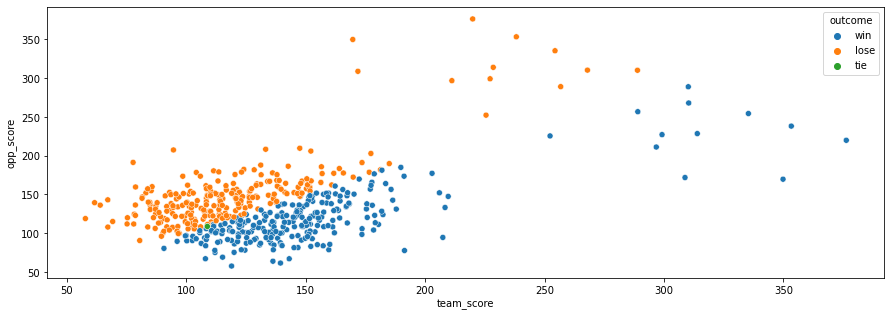

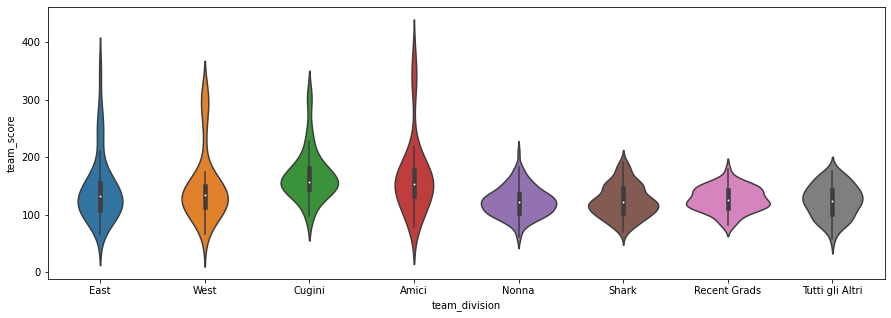

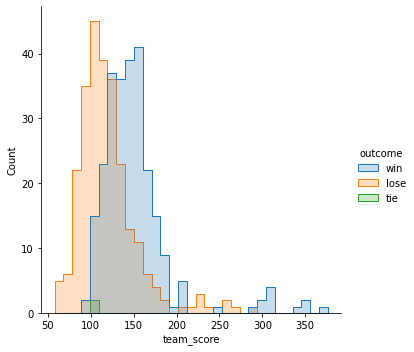

In [493]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=df, 
                x='team_score',
                y='opp_score',
                hue='outcome',
                ax=ax);

fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data=df, 
                x='team_division',
                y='team_score',
                ax=ax);

sns.displot(data=df, 
            x='team_score',
            hue='outcome',
            element='step',
#             kind='kde', bw_adjust=1,
            ax=ax);

# Draft stats

In [79]:
import doritostats.draft_utils
importlib.reload(doritostats.draft_utils)
from doritostats.draft_utils import (
    get_multiple_drafts
)

In [80]:
# %time draft = get_draft_details(league) 2015
draft = get_multiple_drafts(league_id, 2017, 2021, swid, espn_s2)
draft.head()

Fetching 2017 draft...[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
Fetching 2018 draft...[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
Fetching 2019 draft...[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
Fetching 2020 draft...[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...
Fetching 2021 draft...[BUILDING LEAGUE] Fetching league data...
[BUILDING LEAGUE] Gathering roster settings information...
[BUILDING LEAGUE] Loading current league details...


,year,team_owner,team_id,player_name,player_id,round_num,round_pick,pro_team,proj_points,total_points,position,first_letter,points_surprise,positive_surprise,pick_num,value,perc_of_first
0,2017.0,Cesar Diaz,6.0,Le'Veon Bell,15825.0,1.0,1.0,PIT,0.0,299.1,RB,L,299.1,True,1.0,90.3,100.00%
1,2017.0,Carlos Navarrete,4.0,David Johnson,2508176.0,1.0,2.0,ARI,0.0,10.0,RB,D,10.0,True,2.0,78.3,86.71%
2,2017.0,Desi Pilla,1.0,Antonio Brown,13934.0,1.0,3.0,PIT,0.0,259.8,WR,A,259.8,True,3.0,71.3,78.96%
3,2017.0,Julia Selleck,2.0,Julio Jones,13982.0,1.0,4.0,ATL,0.0,207.9,WR,J,207.9,True,4.0,66.4,73.53%
4,2017.0,Marc Chirico,3.0,Odell Beckham Jr.,16733.0,1.0,5.0,NYG,0.0,61.5,WR,O,61.5,True,5.0,62.5,69.21%


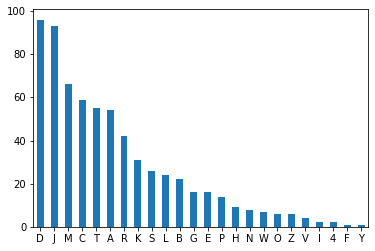

In [70]:
draft['first_letter'].value_counts().plot(kind='bar', rot=0);

In [37]:
get_team_max(draft, 'first_letter', keep=[team.owner for team in league.teams])

<ipython-input-32-88581348f93a>:86: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value_counts['max_count'] = value_counts.max(axis=1)


first_letter,max_value,max_count
team_owner,,
Desi Pilla,J,17.0
Isabella Chirico,D,16.0
JAMES SELLECK,D,3.0
Julia Selleck,D,14.0
Marc Chirico,D,15.0
Nikki Pilla,D,9.0
Vincent Chirico,J,8.0


In [40]:
draft[(draft.first_letter == 'J') & (draft.team_owner == 'Desi Pilla')]

,year,team_owner,team_id,player_name,player_id,round_num,round_pick,pro_team,proj_points,total_points,position,first_letter,points_surprise,positive_surprise,pick_num,value,perc_of_first
9,2017.0,Desi Pilla,1.0,Jordan Howard,3060022.0,2.0,4.0,CHI,0.00,188.20,RB,J,188.20,True,10.0,50.5,55.92%
62,2017.0,Desi Pilla,1.0,Joe Mixon,3116385.0,11.0,3.0,CIN,0.00,126.30,RB,J,126.30,True,63.0,18.7,20.71%
58,2018.0,Desi Pilla,1.0,Jerick McKinnon,16782.0,10.0,5.0,SF,0.00,0.00,RB,J,0.00,False,59.0,19.8,21.93%
73,2018.0,Desi Pilla,1.0,Jay Ajayi,2573300.0,13.0,2.0,PHI,157.52,40.90,RB,J,-116.62,False,74.0,15.9,17.61%
85,2018.0,Desi Pilla,1.0,Jaguars D/ST,-16030.0,15.0,2.0,JAX,121.96,118.00,D/ST,J,-3.96,False,86.0,13.3,14.73%
12,2019.0,Desi Pilla,1.0,JuJu Smith-Schuster,3120348.0,2.0,5.0,PIT,228.78,92.20,WR,J,-136.58,False,13.0,46.0,50.94%
92,2019.0,Desi Pilla,1.0,James Washington,3122449.0,12.0,5.0,PIT,116.52,111.50,WR,J,-5.02,False,93.0,12.0,13.29%
124,2019.0,Desi Pilla,1.0,John Brown,16804.0,16.0,5.0,BUF,114.91,183.82,WR,J,68.91,True,125.0,6.9,7.64%
72,2020.0,Desi Pilla,1.0,Julian Edelman,12649.0,10.0,1.0,NE,158.46,45.72,WR,J,-112.74,False,73.0,16.2,17.94%
87,2020.0,Desi Pilla,1.0,Jordan Howard,3060022.0,11.0,8.0,PHI,138.68,30.20,RB,J,-108.48,False,88.0,12.9,14.29%


WR      237
RB      212
QB       76
TE       62
D/ST     37
K        36
Name: position, dtype: int64

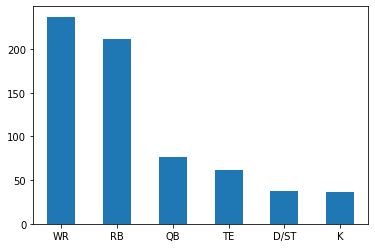

In [41]:
draft['position'].value_counts().plot(kind='bar', rot=0);
draft['position'].value_counts()

In [42]:
get_team_max(draft, 'position', keep=[team.owner for team in league.teams])

<ipython-input-32-88581348f93a>:86: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value_counts['max_count'] = value_counts.max(axis=1)


position,max_value,max_count
team_owner,,
Desi Pilla,WR,35
Isabella Chirico,WR,28
JAMES SELLECK,WR,8
Julia Selleck,RB,32
Marc Chirico,WR,34
Nikki Pilla,RB,19
Vincent Chirico,RB | WR,16


LAR     31
KC      27
DAL     26
PHI     25
TB      25
SF      24
BAL     24
NE      24
NO      24
PIT     24
ATL     24
MIN     23
SEA     23
GB      23
TEN     20
DEN     20
HOU     20
DET     19
ARI     19
LAC     19
NYG     19
CLE     19
CAR     18
CHI     17
IND     17
CIN     16
BUF     16
JAX     15
WSH     15
OAK     13
MIA     12
NYJ     10
None     9
Name: pro_team, dtype: int64

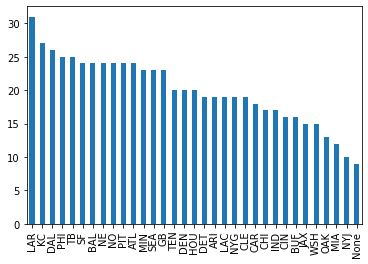

In [65]:
draft['pro_team'].value_counts().plot(kind='bar', rot=90);
draft['pro_team'].value_counts()

In [64]:
get_team_max(draft[draft.round_num <= 10], 'pro_team', keep=[team.owner for team in league.teams])

<ipython-input-32-88581348f93a>:86: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value_counts['max_count'] = value_counts.max(axis=1)


pro_team,max_value,max_count
team_owner,,
Desi Pilla,NO | PIT | SF,4.0
Isabella Chirico,ATL,5.0
JAMES SELLECK,MIN,2.0
Julia Selleck,DAL,6.0
Marc Chirico,PHI | SEA,4.0
Nikki Pilla,DAL | DEN,3.0
Vincent Chirico,ATL | KC | NO | SEA | TB,3.0


In [84]:
get_team_max(draft[draft.round_num < 5].dropna(how='any'), 'player_name', keep=[team.owner for team in league.teams])


<ipython-input-32-88581348f93a>:86: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  value_counts['max_count'] = value_counts.max(axis=1)


player_name,max_value,max_count
team_owner,,
Desi Pilla,Antonio Brown,3.0
Isabella Chirico,Dalvin Cook,2.0
JAMES SELLECK,Calvin Ridley | Dalvin Cook | Keenan Allen | P...,1.0
Julia Selleck,Austin Ekeler | Ezekiel Elliott,2.0
Marc Chirico,Davante Adams | Leonard Fournette,2.0
Nikki Pilla,Aaron Jones | Amari Cooper | Davante Adams | D...,1.0
Vincent Chirico,Alvin Kamara | Chris Carson | Clyde Edwards-He...,1.0


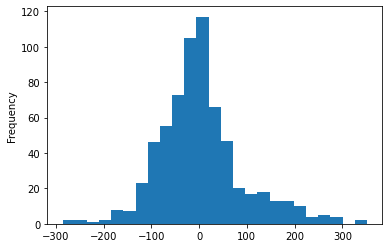

In [85]:
draft['points_surprise'].plot(kind='hist', rot=0, bins=25);

In [86]:
best_pick = draft[draft.year > 2017].sort_values(by='points_surprise', ascending=False).groupby('team_owner').first()
best_pick = best_pick[best_pick.index.isin([team.owner for team in league.teams])]
best_pick

,year,team_id,player_name,player_id,round_num,round_pick,pro_team,proj_points,total_points,position,first_letter,points_surprise,positive_surprise,pick_num,value,perc_of_first
team_owner,,,,,,,,,,,,,,,,
Desi Pilla,2019.0,1.0,Austin Ekeler,3068267.0,6.0,5.0,LAC,146.54,263.00,RB,A,116.46,True,45.0,24.5,27.13%
Isabella Chirico,2018.0,4.0,Christian McCaffrey,3117251.0,4.0,1.0,CAR,224.03,332.00,RB,C,107.97,True,19.0,39.4,43.63%
JAMES SELLECK,2021.0,8.0,Mark Andrews,3116365.0,8.0,6.0,BAL,166.08,247.60,TE,M,81.52,True,62.0,19.0,21.04%
Julia Selleck,2021.0,2.0,Deebo Samuel,3126486.0,10.0,8.0,SF,159.29,300.46,WR,D,141.17,True,80.0,14.6,16.17%
Marc Chirico,2020.0,3.0,Josh Allen,3918298.0,14.0,3.0,BUF,273.18,395.56,QB,J,122.38,True,107.0,9.6,10.63%
Nikki Pilla,2020.0,6.0,Ryan Tannehill,14876.0,18.0,7.0,TEN,239.16,343.86,QB,R,104.70,True,143.0,4.5,4.98%
Vincent Chirico,2020.0,7.0,Aaron Rodgers,8439.0,18.0,5.0,GB,264.22,382.76,QB,A,118.54,True,141.0,4.8,5.32%


In [87]:
best_pick = draft[draft.year > 2017].sort_values(by='points_surprise', ascending=False).groupby('position').first()
best_pick

,year,team_owner,team_id,player_name,player_id,round_num,round_pick,pro_team,proj_points,total_points,first_letter,points_surprise,positive_surprise,pick_num,value,perc_of_first
position,,,,,,,,,,,,,,,,
D/ST,2019.0,Desi Pilla,1.0,Ravens D/ST,-16033.0,15.0,4.0,BAL,95.85,164.00,R,68.15,True,116.0,8.2,9.08%
K,2019.0,Ellie Knecht,8.0,Harrison Butker,3055899.0,15.0,5.0,KC,138.47,162.00,H,23.53,True,117.0,8.0,8.86%
QB,2020.0,Marc Chirico,3.0,Josh Allen,3918298.0,14.0,3.0,BUF,273.18,395.56,J,122.38,True,107.0,9.6,10.63%
RB,2019.0,Gabriel S,5.0,Christian McCaffrey,3117251.0,1.0,1.0,CAR,292.75,413.20,C,120.45,True,1.0,90.3,100.00%
TE,2021.0,JAMES SELLECK,8.0,Mark Andrews,3116365.0,8.0,6.0,BAL,166.08,247.60,M,81.52,True,62.0,19.0,21.04%
WR,2021.0,Gabriel S,5.0,Cooper Kupp,2977187.0,5.0,6.0,LAR,189.21,367.00,C,177.79,True,38.0,27.4,30.34%


In [88]:
worst_pick = draft[draft.year > 2017].sort_values(by='points_surprise', ascending=False).groupby('position').last()
worst_pick

,year,team_owner,team_id,player_name,player_id,round_num,round_pick,pro_team,proj_points,total_points,first_letter,points_surprise,positive_surprise,pick_num,value,perc_of_first
position,,,,,,,,,,,,,,,,
D/ST,2020.0,Vincent Chirico,7.0,49ers D/ST,-16025.0,10.0,5.0,SF,143.01,102.00,4,-41.01,False,77.0,15.2,16.83%
K,2019.0,Vincent Chirico,7.0,Stephen Gostkowski,9704.0,13.0,8.0,NE,135.67,32.00,S,-103.67,False,104.0,10.0,11.07%
QB,2019.0,Marc Chirico,3.0,Cam Newton,13994.0,12.0,2.0,CAR,302.42,16.68,C,-285.74,False,90.0,12.5,13.84%
RB,2018.0,Marc Chirico,3.0,Le'Veon Bell,15825.0,1.0,1.0,PIT,251.36,0.00,L,-251.36,False,1.0,90.3,100.00%
TE,2019.0,Isabella Chirico,4.0,David Njoku,3123076.0,13.0,2.0,CLE,121.00,12.60,D,-108.40,False,98.0,11.1,12.29%
WR,2019.0,Desi Pilla,1.0,Antonio Brown,13934.0,4.0,5.0,None,196.50,14.10,A,-182.40,False,29.0,32.1,35.55%


In [90]:
best_player = draft[draft.year == 2021].sort_values(by='total_points', ascending=False).groupby('position').first()
best_player

,year,team_owner,team_id,player_name,player_id,round_num,round_pick,pro_team,proj_points,total_points,first_letter,points_surprise,positive_surprise,pick_num,value,perc_of_first
position,,,,,,,,,,,,,,,,
D/ST,2021.0,Vincent Chirico,7.0,Bills D/ST,-16002.0,14.0,7.0,BUF,133.41,163.00,B,29.59,True,111.0,8.9,9.86%
K,2021.0,Nikki Pilla,6.0,Justin Tucker,15683.0,13.0,4.0,BAL,142.55,160.00,J,17.45,True,100.0,10.7,11.85%
QB,2021.0,Isabella Chirico,4.0,Josh Allen,3918298.0,4.0,4.0,BUF,377.50,402.58,J,25.08,True,28.0,32.7,36.21%
RB,2021.0,Gabriel S,5.0,Jonathan Taylor,4242335.0,2.0,3.0,IND,244.12,353.10,J,108.98,True,11.0,48.9,54.15%
TE,2021.0,JAMES SELLECK,8.0,Mark Andrews,3116365.0,8.0,6.0,BAL,166.08,247.60,M,81.52,True,62.0,19.0,21.04%
WR,2021.0,Gabriel S,5.0,Cooper Kupp,2977187.0,5.0,6.0,LAR,189.21,367.00,C,177.79,True,38.0,27.4,30.34%


In [91]:
worst_player = draft[draft.year == 2021].sort_values(by='total_points', ascending=False).groupby('position').last()
worst_player

,year,team_owner,team_id,player_name,player_id,round_num,round_pick,pro_team,proj_points,total_points,first_letter,points_surprise,positive_surprise,pick_num,value,perc_of_first
position,,,,,,,,,,,,,,,,
D/ST,2021.0,Nikki Pilla,6.0,Ravens D/ST,-16033.0,14.0,5.0,BAL,125.85,88.0,R,-37.85,False,109.0,9.2,10.19%
K,2021.0,JAMES SELLECK,8.0,Jason Myers,2473037.0,16.0,6.0,SEA,140.20,98.0,J,-42.20,False,126.0,6.7,7.42%
QB,2021.0,Nikki Pilla,6.0,Deshaun Watson,3122840.0,17.0,4.0,HOU,0.00,0.0,D,0.00,False,132.0,5.9,6.53%
RB,2021.0,Desi Pilla,1.0,Gus Edwards,3051926.0,6.0,2.0,BAL,0.00,0.0,G,0.00,False,42.0,25.7,28.46%
TE,2021.0,Julia Selleck,2.0,Blake Jarwin,2991767.0,15.0,1.0,DAL,91.99,27.1,B,-64.89,False,113.0,8.6,9.52%
WR,2021.0,Marc Chirico,3.0,Michael Thomas,2976316.0,10.0,1.0,NO,138.55,0.0,M,-138.55,False,73.0,16.2,17.94%


In [93]:
perc_boom = draft[draft.year > 2017].sort_values(by='positive_surprise', ascending=False).groupby('team_owner').mean()
perc_boom = perc_boom[['positive_surprise', 'proj_points', 'total_points', 'points_surprise']]
perc_boom.rename(columns={'positive_surprise':'Boom %',
                          'proj_points':'Avg. Projected Points',
                          'total_points':'Avg. Total Points',
                          'points_surprise': 'Avg. Points Surprise'},
                inplace=True)
perc_boom = perc_boom.sort_values(by='Boom %', ascending=False)

perc_boom = perc_boom[perc_boom.index.isin([team.owner for team in league.teams])]
perc_boom

,Boom %,Avg. Projected Points,Avg. Total Points,Avg. Points Surprise
team_owner,,,,
Desi Pilla,0.397260,177.080959,155.231507,-21.849452
JAMES SELLECK,0.388889,195.686667,173.005556,-22.681111
Nikki Pilla,0.370370,177.487037,155.511481,-21.975556
Marc Chirico,0.369863,180.013973,152.482740,-27.531233
Vincent Chirico,0.333333,179.741111,152.174444,-27.566667
Isabella Chirico,0.315068,184.109452,156.761370,-27.348082
Julia Selleck,0.315068,180.391644,154.078630,-26.313014


<ipython-input-105-b0b0f07b78a8>:85: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


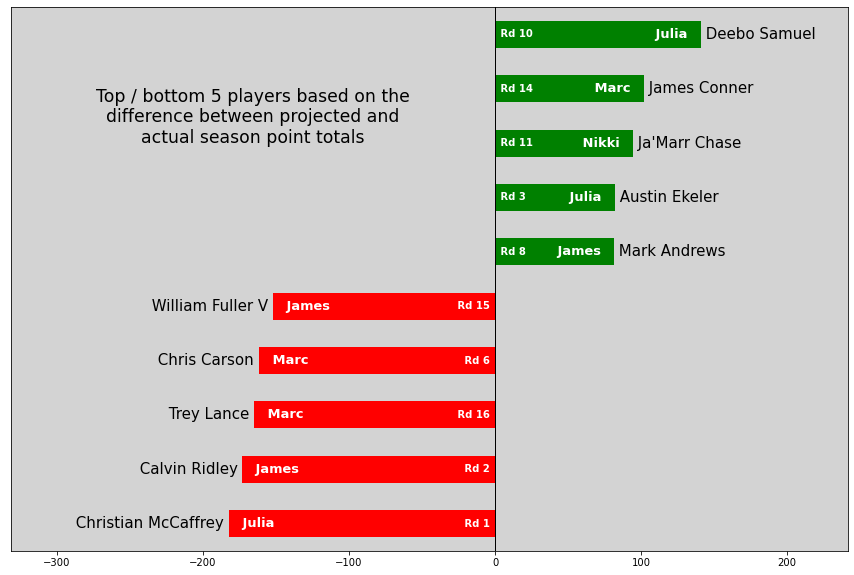

In [105]:
import matplotlib.pyplot as plt

def plot_surprise(draft, year: int, owner: str, sort_by='round_num', asc=False):
    '''
    sort_by = {'round_num', 'points_surprise'}
    '''
    if sort_by == 'points_surprise': asc = True
    sub = draft[(draft.year == year) & (draft.team_owner == owner)].sort_values(by=sort_by, ascending=asc)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    sub.plot(x='player_name', 
             y='points_surprise', 
             kind='barh',
             color=(sub.points_surprise > 0).map({True: 'g', False: 'r'}),
             legend=None,
             ax=ax)
    plt.axvline(0, color='k', lw=1)
    ax.set_ylabel('')
    if sort_by == 'points_surprise': ax.set_yticks([])
    else: ax.set_yticklabels('Rd ' + sub.round_num.astype(str).str[:-2])

    for i, (name, height) in enumerate(zip(sub.player_name, sub.points_surprise)):
        ha = 'right' if height < 0 else 'left'
        ax.text(height, i, ' {} '.format(name),
                ha=ha, va='center', rotation=0, fontsize=10)

    xmin, xmax = ax.get_xlim()
    xmin -= len(sub.player_name.iloc[0])*3
    xmax += len(sub.player_name.iloc[-1])*2
    ax.set_xlim(xmin, xmax)
    ax.set_title(owner, fontsize='x-large')

    fig.show();
    
    
def plot_top_surprise(draft, year: int, top: int = 5):
    sub = draft[draft.year == year].sort_values(by='points_surprise', ascending=True).dropna(how='any')
    sub = draft[(draft.year == year) & (draft.team_owner != 'Gabriel S')].sort_values(by='points_surprise', ascending=True).dropna(how='any')
    sub = pd.concat([sub.head(top), sub.tail(5)])
    
    fig, ax = plt.subplots(figsize=(15, 10))
    sub.plot(x='player_name', 
             y='points_surprise', 
             kind='barh',
             color=(sub.points_surprise > 0).map({True: 'g', False: 'r'}),
             legend=None,
             ax=ax)
    plt.axvline(0, color='k', lw=1)
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_yticklabels([])
#     ax.set_title('Points Surpise', size='xx-large')

    # Add player name
    for i, (name, height) in enumerate(zip(sub.player_name, sub.points_surprise)):
        ha = 'right' if height < 0 else 'left'
        text = ' {} '.format(name)
        ax.text(height, i, text, ha=ha, va='center', rotation=0, fontsize=15)

    # Add team owner
    for i, (owner, height) in enumerate(zip(sub.team_owner, sub.points_surprise)):
        ha = 'right' if height > 0 else 'left'
        text = '   {}   '.format(owner.split(' ')[0].title())
        ax.text(height, i, text, ha=ha, va='center', rotation=0, fontsize=13, weight='bold', color='white')
    
    # Add round number
    for i, (rd, height) in enumerate(zip(sub.round_num, sub.points_surprise)):
        ha = 'right' if height < 0 else 'left'
        text = ' Rd {:.0f} '.format(rd, owner)
        height = 1 if height > 0 else -1
        ax.text(height, i, text, ha=ha, va='center', rotation=0, fontsize=10, weight='bold', color='white')
        
    
    xmin, xmax = ax.get_xlim()
    xmin -= len(sub.player_name.iloc[0])*7
    xmax += len(sub.player_name.iloc[-1])*7
    ax.set_xlim(xmin, xmax)
    
    ax.text(xmin / 2, 
            int(top*1.5), 
            'Top / bottom 5 players based on the\ndifference between projected and\nactual season point totals',
            ha='center',
            fontsize='xx-large')    
    
    
    ax.set_facecolor('lightgray')
    fig.show();
    
# plot_surprise(draft, 2020, 'Desi Pilla', 'points_surprise')
# plot_surprise(draft, 2020, 'Josh Barnhart', 'round_num')
plot_top_surprise(draft, 2021)

<ipython-input-105-b0b0f07b78a8>:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


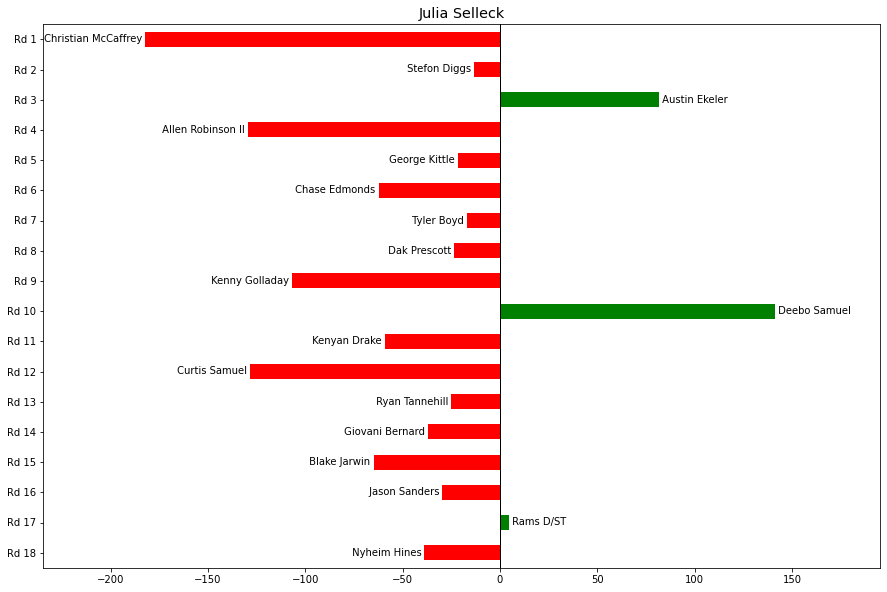

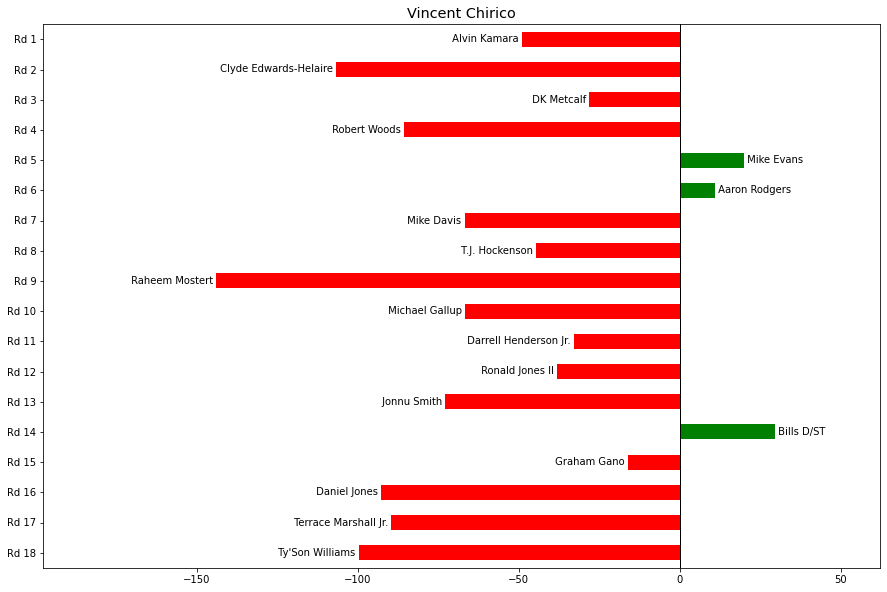

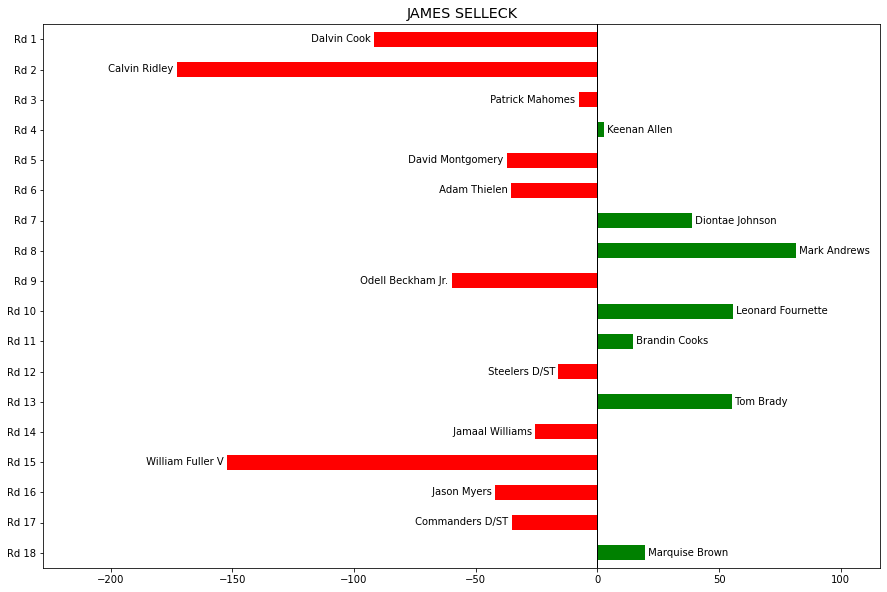

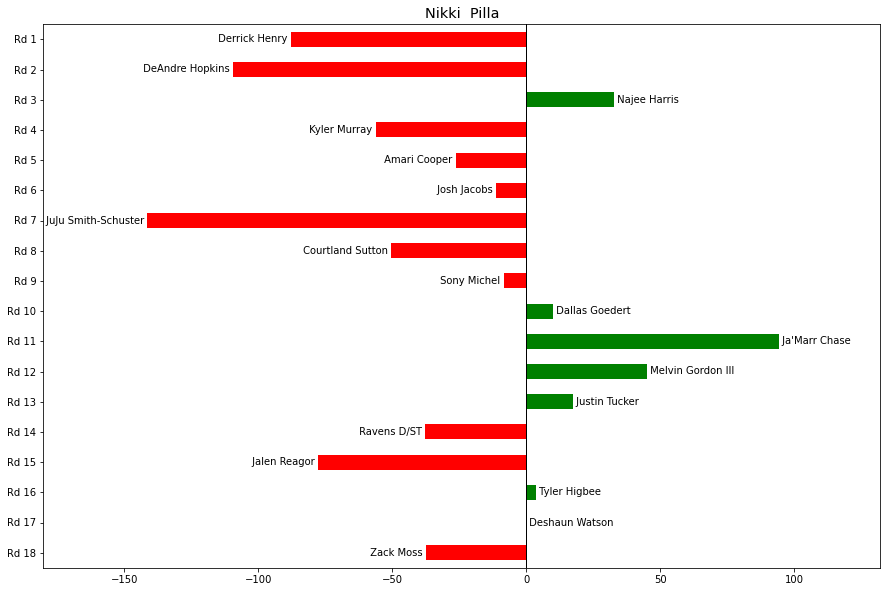

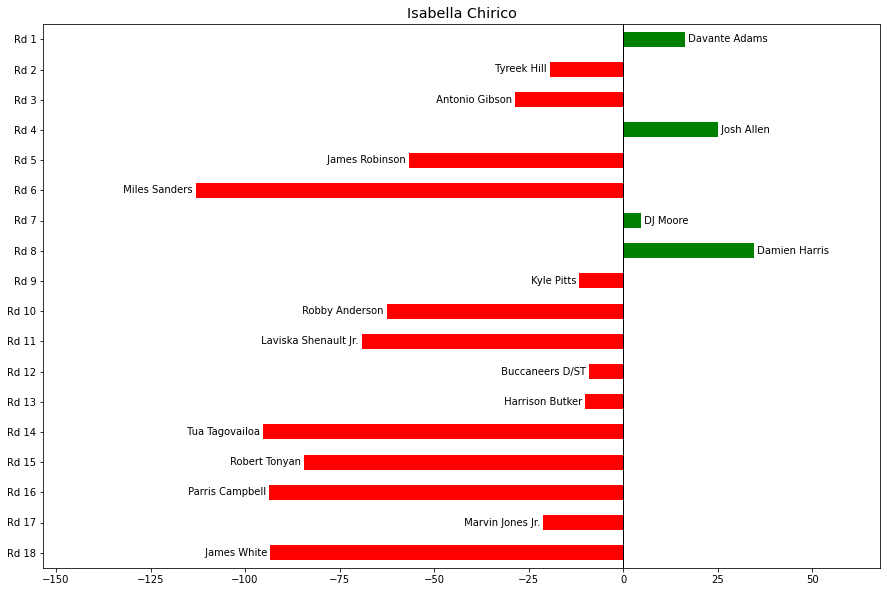

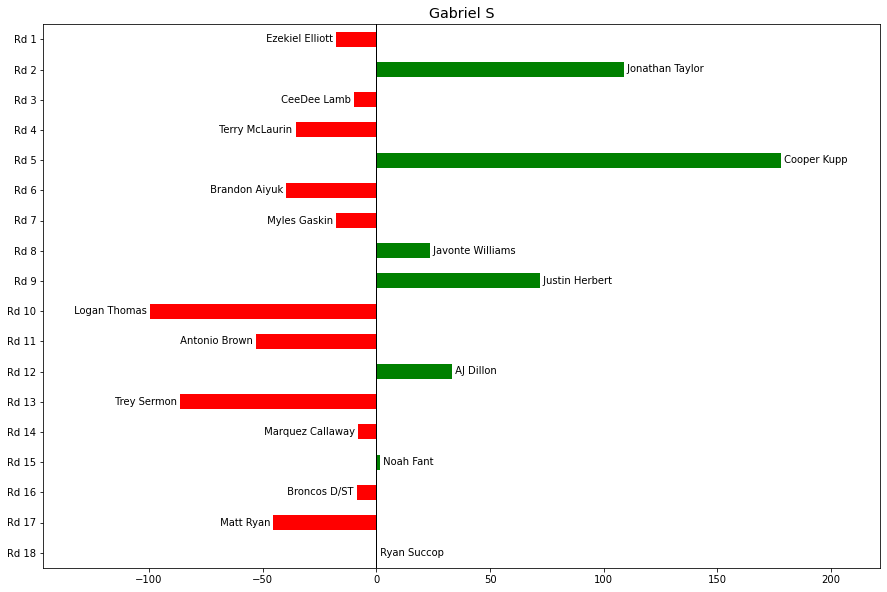

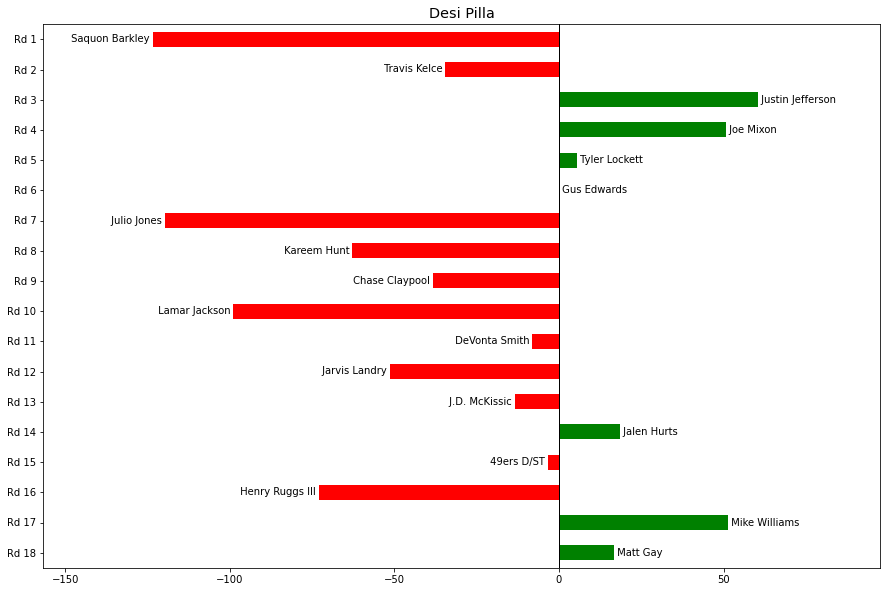

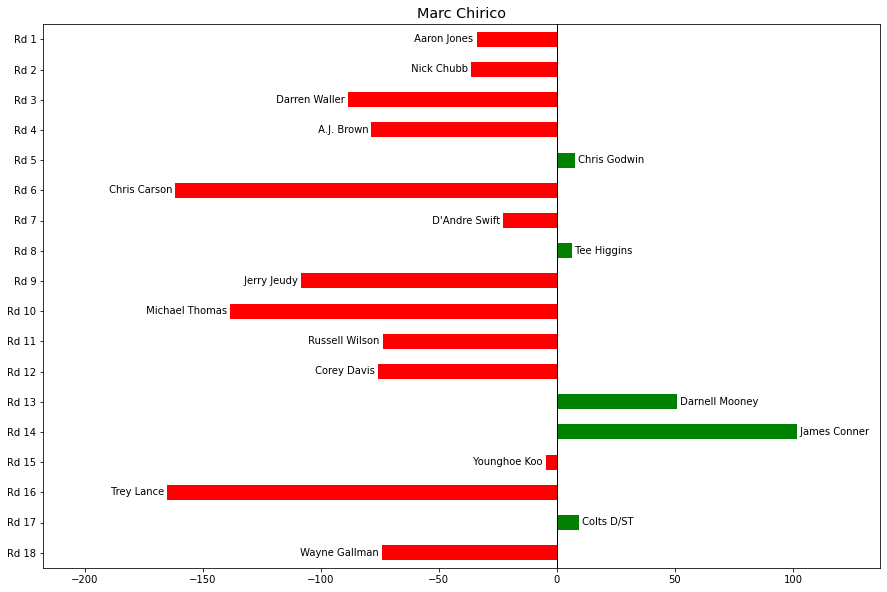

In [106]:
for name in draft[draft.year == 2021].team_owner.unique():
    plot_surprise(draft, 2021, name)

In [107]:
draft[draft.year > 2017].positive_surprise.mean()

0.3626373626373626